## Кластеризация 

Насрутдинов Марат

__Задание:__ Настройка числа кластеров в алгоритме K-Means. Elbow и Silhouette метод.
Цель: Используя данный датасет https://archive.ics.uci.edu/ml/datasets/Wholesale+customers произвести кластеризацию методом k-means. Проверить оптимальное число k с применением silhouette score методом локтя(elbow).

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#from sklearn import preprocessing

In [5]:
#data_scaled = preprocessing.scale(data) 

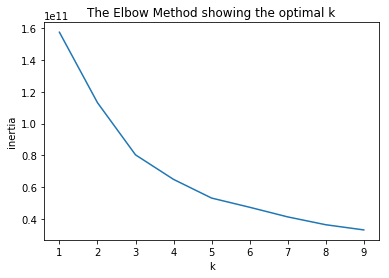

In [6]:
inertia = []
k = range(1, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(data)
    km.fit(data)
    inertia.append(km.inertia_)
 
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

Чиcло кластеров лучше выбрать = 3

[0.51153338829803674, 0.47977587145684614, 0.39555561363062758, 0.37043492711384712, 0.31475814644201777, 0.34219770685333023, 0.32752832748824262, 0.29978720307087492]


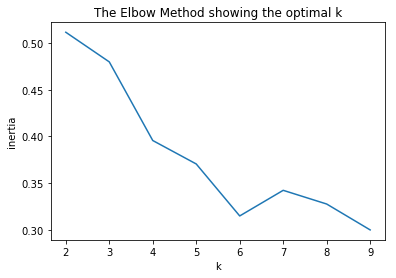

In [7]:
from sklearn.metrics import silhouette_score
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(data)
    km.fit(data)
    inertia.append(silhouette_score(data, km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

In [8]:
km = KMeans(n_clusters=3).fit(data)
y_predict=km.predict(data)
new_data=data.copy()
new_data["cluster"]=y_predict


In [9]:
import seaborn as sns

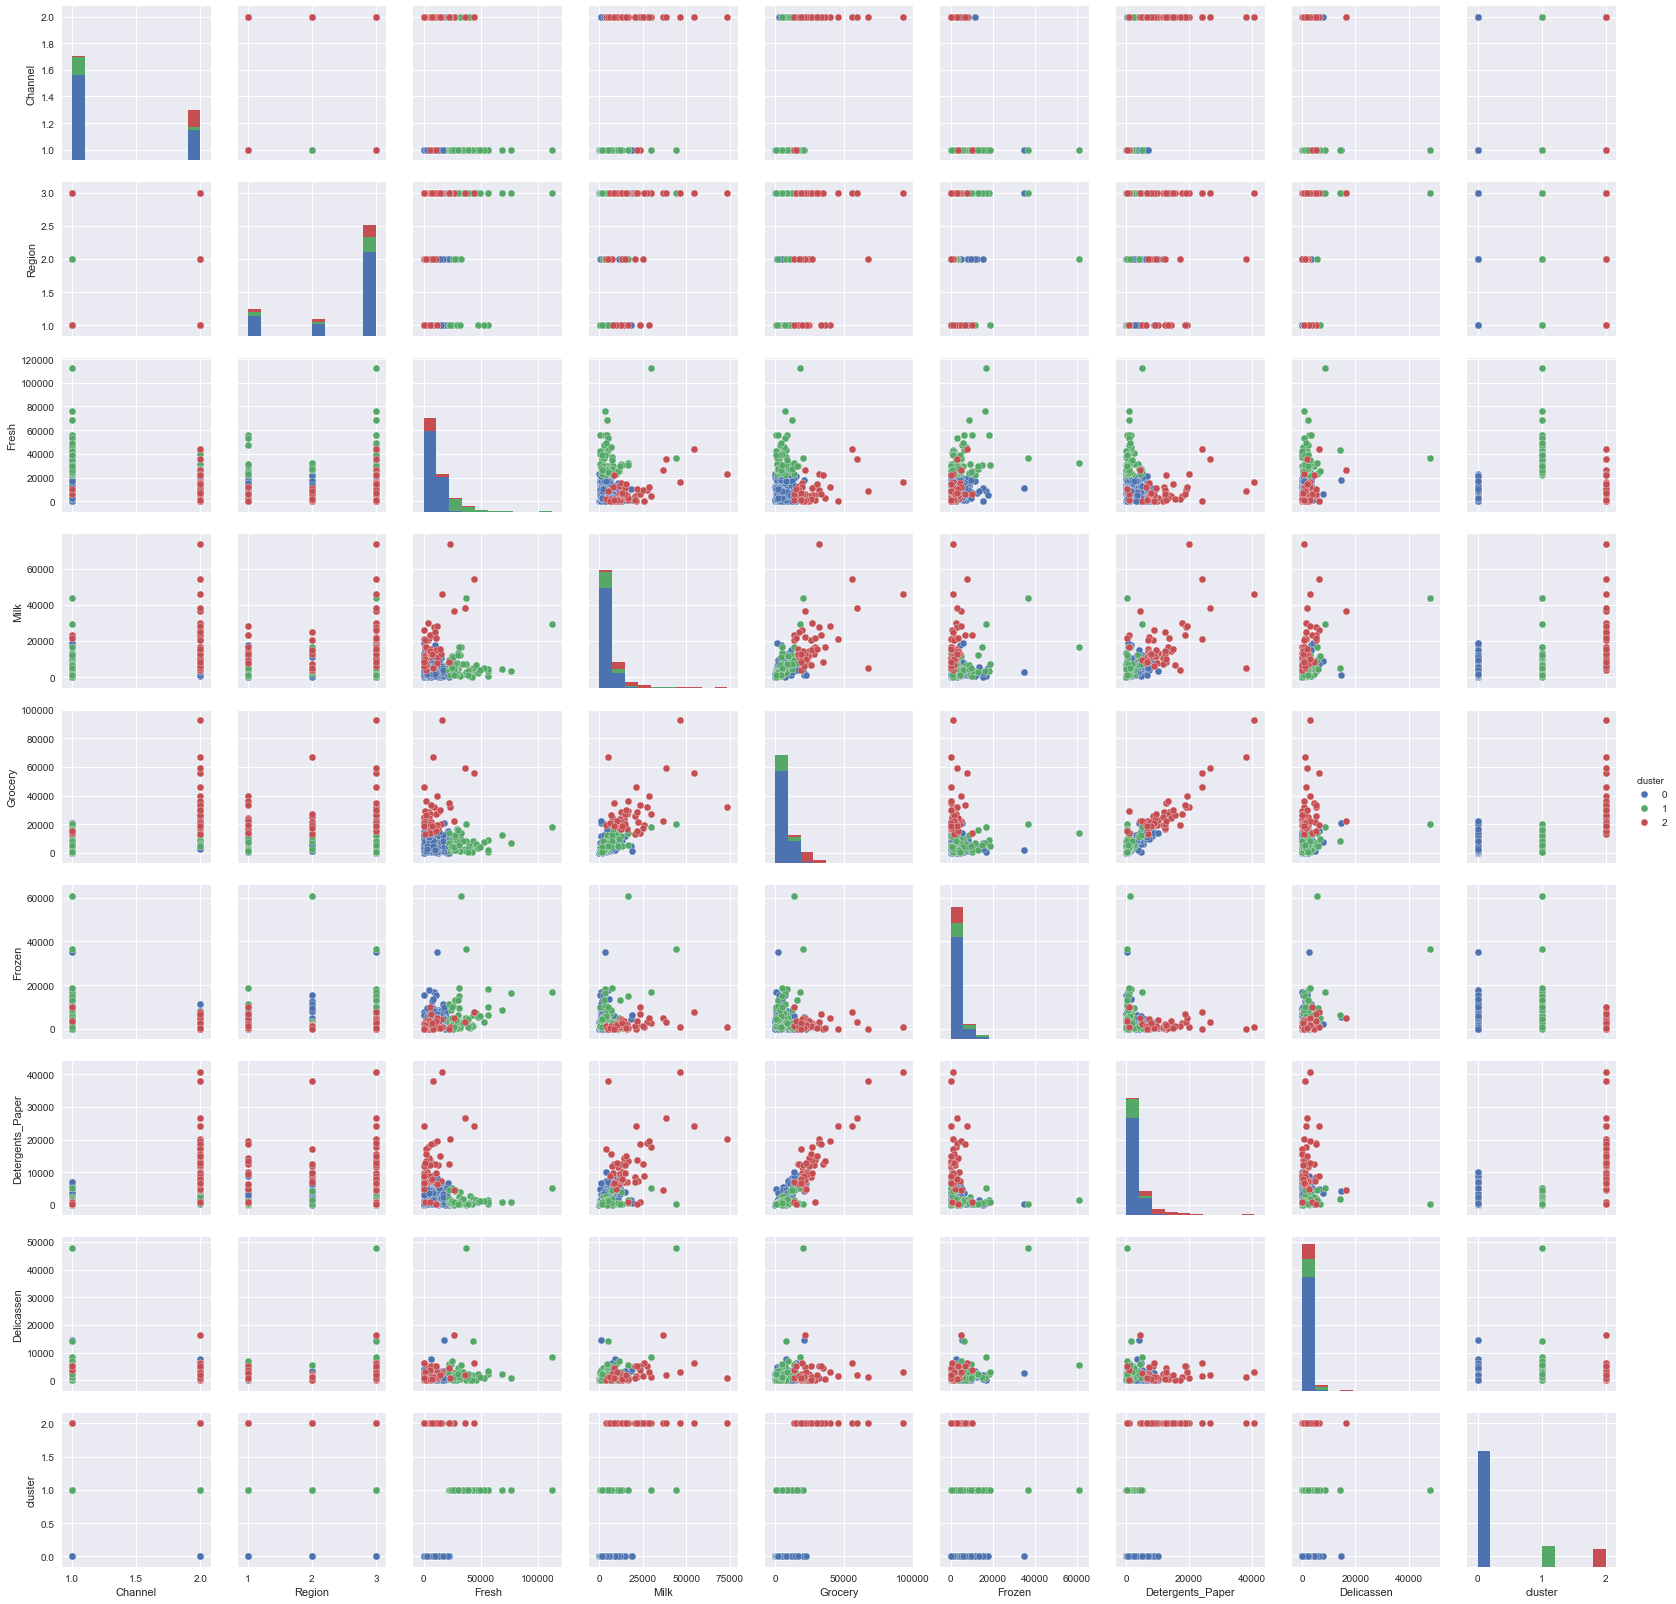

In [10]:
sns.pairplot(new_data,hue="cluster")

Так как данные линейно не разделимы, то по парам признаков кластеризация не выглядит убедительно.